# Introduction
In this project, I'm going to analyze a dataset of 891 passenger records from the Titanic. I'm interested in looking at what factors were correlated with passenger survival. This data is a sample, as the total population size of titanic passengers was 2224. I actually know very little about the Titanic incident, so it will interesing to see if my preconceptions about survival factors end up being correct or false.

To get started, I will import some handy Python libraries and set up some functions that I can reuse as I'm evaluating different factors and how they are correlated with passenger survival rate.

## Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Re-usable functions

In [9]:
def group_and_report(df,factor):
    #Pull just the survival column and the factor we're looking at 
    reduced_df = df[[factor,'Survived']]
    
    #Since survived = 1 in the 'Survived' column, a sum function will return the number of people who survived
    survival = reduced_df.groupby(factor).sum()
    
    #Add extra columns that help make the info more meaningful
    survival['On Board'] = reduced_df.groupby(factor).count()
    survival['Percent Survived'] = (reduced_df.groupby(factor).sum()/reduced_df.groupby(factor).count())*100.
    return survival

def group_and_graph(df,factor,title):
    reduced_df = df[[factor,'Survived']]
    survival = reduced_df.groupby(factor).sum()
    survival['Died'] = reduced_df.groupby(factor).count() - reduced_df.groupby(factor).sum()
    graph = survival.plot.bar(stacked=True, title=title) 
    graph.set_ylabel("Number of Passengers")

def print_correlation(x, y):
    #Allow default of using Bessel's correction in std() function, as we have a sample, not a population.
    dist_x = (x - x.mean()) / x.std()
    dist_y = (y - y.mean()) / y.std()
    correlation = np.corrcoef(dist_x, dist_y)
    print correlation

def age_logic(age):
    if age < 1:
        label = '00: baby'
    elif age <= 3:
        label = '01-03: toddler'
    elif age <= 12:
        label = '04-12: child'
    elif age <= 18:
        label = '13-18: adolescent'
    else:
        label = '19+: adult'
    return label

# Exploring and Cleaning the Data

Let's take a look at what type of passenger data we have available. You can see a sample of the data displayed below.

In [3]:
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
1,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
2,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
3,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
4,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
5,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
6,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
7,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
8,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
9,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S


For my analysis, I'm interested in investigating how the passengers' sex, age, class, and number of family members on board impacted survival rate.

# Factors Impacting Survival

## Overall Survival Rate

First, let's take a look at overall survival rate for the sample of 891 passengers.

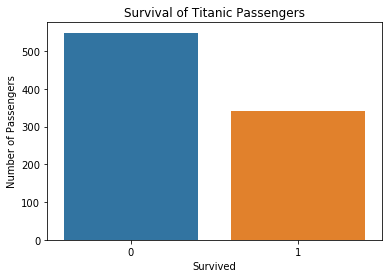

In [24]:
survival_tally = pd.Series(titanic_data['Survived'])
#survival_tally.groupby(survival_tally['Survived']).count().plot.bar()
grph = sns.countplot(x=survival_tally)
grph.set_title("Survival of Titanic Passengers")
grph.set_ylabel("Number of Passengers")

In [6]:
survival_tally.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

From the information displayed above, we can see that over 500 people died and over 350 people survived from the sample we have. Only 38.4 percent of the sample passengers survived. Not very good odds! What characteristics were correlated with a higher-than-average rate of survival?

## How does gender impact survival?

Before I looked at the data, I expected that males would have a higher rate of survival than females. I was thinking males would be more physically able to swim to survival and hang onto the rescue boats. However, that was not the case at all. Let's take a look at survival information by sex.

        Survived  On Board  Percent Survived
Sex                                         
female       233       314         74.203822
male         109       577         18.890815


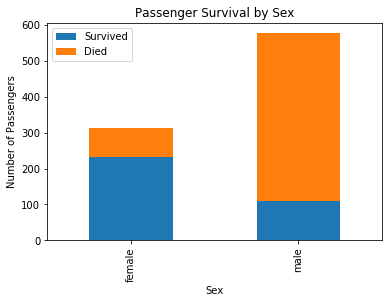

In [10]:
print(group_and_report(titanic_data,'Sex'))
group_and_graph(titanic_data,'Sex', 'Passenger Survival by Sex')

74.0 percent of females survived, while only 18.9 percent of males survived. That's surprising! Let's see how strongly survival and being female are correlated.

In [8]:
quantify_male_female = pd.Series(np.where(titanic_data['Sex']=='male', 1, 2))
print_correlation(survival_tally,quantify_male_female)

[[ 1.          0.54335138]
 [ 0.54335138  1.        ]]


[Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) for the linear relationship between being female and surviving is .54. 

Based on historical accounts of the event, I learned that rescue boats were loaded with a "women and children first" policy. With this additional information, it's fair to say that sex was a causal factor in survival rates of passengers. That causal relationship would not be possible to derive from the data set alone, though.

## How does age impact survival?

Let's take a look at survival by age. We know there was a "women and children first" policy. How strong is the correlation between youth and survival?

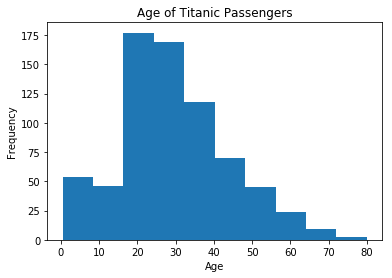

In [26]:
graph = titanic_data['Age'].plot.hist()
graph.set_xlabel("Age")
graph.set_title("Age of Titanic Passengers")

One important thing to note is that age is not recorded for all passengers. There are a couple different ways that I could deal with this. Some potential treatments include: I could just ignore data where age information is missing, I could replace missing age fields with mean value for age, or I could replace missing age fields with the median age for all age fields that are present.

In this case, I am going to actually drop the rows where age data is not present. If I were curious about the general shape of the age data, replacing missing information with the mean or median could be good choices. However, I want to know how age impacts survival. What if missing age fields are not random -- what if they were left blank based on some bias, such as these people are all children? In that case, replacing empty fields with the mean age would give me a very inacurrate picture for survival by age. AND, due to that same potential bias, it is possible that my sample data is inherently flawed, and the survival rate of the entire Titanic population will not be accurately represented by this analysis.

In [27]:
survival_by_age = titanic_data[['Age','Survived']].dropna().sort_values('Age')
print_correlation(survival_by_age['Survived'],survival_by_age['Age'])

[[ 1.         -0.07722109]
 [-0.07722109  1.        ]]


On first analysis, it looks like age and survival were not highly correlated. The negative number means that as age increases, survival rate goes down. But the correlation coefficient is so close to 0 that it seems practically negligble. How can that be? Now that I have read more about the Titanic incident, I know that rescue boats were loaded with a "women and children first" policy. 

My age range spans from 0 to 80. I think that the wide spread of age and higher quantity of adult passengers are not accurately reflecting how this policy impacted survival rate based on age bracket.

I'm going to create a new column that classifies the age groups so I can make a bar graph based on that. I will define 0 years old as "baby," 1-3 as "toddler," 4-12 as "child," 13-18 as "adolescent," and 19 and higher as "adult." 

                   Survived  On Board  Percent Survived
Age Category                                           
00: baby                  7         7        100.000000
01-03: toddler           13        23         56.521739
04-12: child             20        39         51.282051
13-18: adolescent        30        70         42.857143
19+: adult              220       575         38.260870


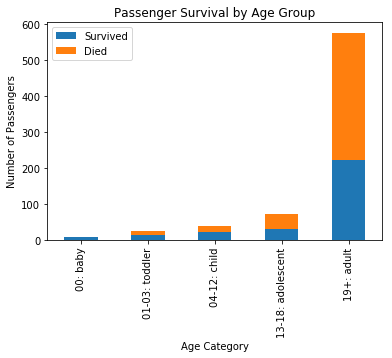

In [28]:
survival_by_age['Age Category'] = survival_by_age['Age'].apply(age_logic)
print(group_and_report(survival_by_age,'Age Category'))
group_and_graph(survival_by_age,'Age Category','Passenger Survival by Age Group')

From this grouping, we can see the policy at work. From the data that I have available, it looks like correlation between youth and a higher rate of survival. It's interesting to me that toddlers, children, and adolescents had lower survival rates than women. I would have expected more of an equal rate of survival between women and children, given what I know about the "women and children first" policy.

## How does ticket class impact survival?

I definitely think that a higher class will be correlated with higher survival rates. First, I'm guessing higher class tickets are located higher within the boat, so closer to an escape route. Second, I'm guessing the operators of the Titanic would prioritize higher class passengers for the limited space on the rescue boats. Let's see if I'm right. 

        Survived  On Board  Percent Survived
Pclass                                      
1            136       216         62.962963
2             87       184         47.282609
3            119       491         24.236253


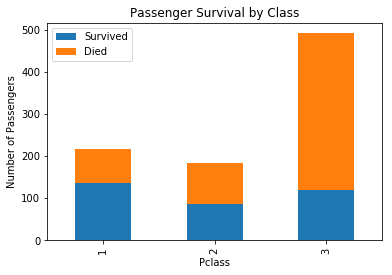

In [29]:
print(group_and_report(titanic_data,'Pclass'))
group_and_graph(titanic_data,'Pclass','Passenger Survival by Class')

A higher class ticket was, indeed, correlated with a higher survival rate. You can see that classes 1 and 2 had higher rates of survival than the average for the full sample of 891 passengers. And class 3 passengers had a lower survival rate than average for the whole sample group.

In [14]:
class_tally = pd.Series(titanic_data['Pclass'])
print_correlation(survival_tally,class_tally)

[[ 1.         -0.33848104]
 [-0.33848104  1.        ]]


I also wanted to see what Pearson's correlation coefficent would be for class. It was -0.338. A negative correlation means that survival rate decreased as class increased. Since a higher class number actually represents a "lower" class, this is consistent with my expectations.

## How does family size impact survival?

Finally, I was curious to see if passengers with more family members on board would have a higher rate of survival. My theory is that they would -- as someone would be watching out for them and helping them reach the survival rafts. Let's take a look.

** Add histogram **

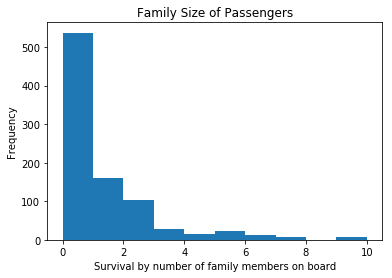

In [31]:
family_members_tally = pd.Series(titanic_data['SibSp'] + titanic_data['Parch'])
graph = family_members_tally.plot.hist(title='Family Size of Passengers')
graph.set_xlabel("Survival by number of family members on board")

In [26]:
survival_and_family_count = pd.DataFrame({'Survived': survival_tally, 'Family Members':family_members_tally})
grouped_family = group_and_report(survival_and_family_count,'Family Members')
print(grouped_family)

                Survived  On Board  Percent Survived
Family Members                                      
0                    163       537         30.353818
1                     89       161         55.279503
2                     59       102         57.843137
3                     21        29         72.413793
4                      3        15         20.000000
5                      3        22         13.636364
6                      4        12         33.333333
7                      0         6          0.000000
10                     0         7          0.000000


It's hard for me to tell if family size has a correlation with survival outcomes. Also, as I look at this data, I don't feel like passengers with 7 family members or 10 family members should be included -- there is such a small subset of them. However, when I split this data into quartiles, find the IQR, and use that to find what might be considered an outlier in survival rate, none of these would be considered outliers. So I'll leave the data as shown above. 

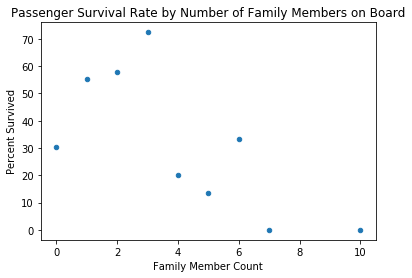

In [18]:
survival_and_family_count = pd.DataFrame({'Family Member Count': grouped_family.index.tolist(),\
                                         'Percent Survived': list(grouped_family['Percent Survived'])})
survival_and_family_count.plot.scatter(x='Family Member Count',y='Percent Survived',title='Passenger Survival Rate by Number of Family Members on Board')

In [19]:
print_correlation(survival_and_family_count['Percent Survived'], survival_and_family_count['Family Member Count'])

[[ 1.         -0.70032663]
 [-0.70032663  1.        ]]


Based on Pearson's correlation coefficient, larger familes are negatively correlated with survival. I do want to use some caution on this one, though, as there is a huge spike in survival rates for passengers with 1, 2, and 3 family members on board. For passengers with 4 or more family members, the survival rate drops significantly. But there are also much fewer passengers on board with families that large. So I'm not completely convinced that the factors are correlated, despite the high number for Pearson's R. 

# Conclusions

So -- how do all these independent variables come together to paint a picture of survival across class, gender, and age? I've created a chart below where you can visually explore survival rates. I did not include family size in this grouping, as I was unsure of its effect.

In [20]:
titanic_data['Age Category'] = titanic_data['Age'].apply(age_logic)
titanic_data_summary = titanic_data[['Sex','Age Category','Pclass','Survived']]
summary_table = titanic_data_summary.groupby(['Pclass','Sex','Age Category']).sum()
summary_table['On Board'] = titanic_data_summary.groupby(['Pclass','Sex','Age Category']).count()
summary_table['Percent of Total'] = (titanic_data_summary.groupby(['Pclass','Sex','Age Category']).sum())/(titanic_data_summary.groupby(['Pclass','Sex','Age Category']).count())*100.
print(summary_table)

                                 Survived  On Board  Percent of Total
Pclass Sex    Age Category                                           
1      female 01-03: toddler            0         1          0.000000
              13-18: adolescent        10        10        100.000000
              19+: adult               81        83         97.590361
       male   00: baby                  1         1        100.000000
              04-12: child              2         2        100.000000
              13-18: adolescent         1         2         50.000000
              19+: adult               41       117         35.042735
2      female 01-03: toddler            2         2        100.000000
              04-12: child              6         6        100.000000
              13-18: adolescent         6         6        100.000000
              19+: adult               56        62         90.322581
       male   00: baby                  3         3        100.000000
              01-03:

In my analysis, the following factors were correlated with higher survival outcomes: being female, being a young child, and having purchased a higher class ticket. It's important to note that I do not know if my data set was a random sample from the entire population of Titanic passengers. It's possible that data with some underlying bias. If that is the case, my sample data would not accurately represent the larger population, because my sample is not random. 

There are further factors to explored to describe different groups' survival rates. It would be interesting to explore survival by city of embarkation. I'm also curious to know about crew survival rates. However, the data set I looked at did not include information or survival statistics from crew members.

Looking through the passenger list and seeing a list of 1s and 0s in the 'Survived' column has been a surreal experience. I feel like a god peering into the destiny of mortals in some other realm. 

The sinking of the *Titanic* was one of the deadliest maritime disasters to occur under peaceful circumstances. The tragic incident sparked outrage in both the UK and in the US. It spurred close investigation and creation of maritime safety standards that are still in place today.